In [1]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\perfe\\AppData\\Local\\Temp\\pip-uninstall-t9gdsxyt\\pip.exe'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=dd5a1271e1137fb57cc64af3a80cca6c1ccd67737f26d2215af87f5922e7f9f0
  Stored in directory: c:\users\perfe\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils
     --------------------------------------- 35.4/35.4 MB 21.9 MB/s eta 0:00:00


In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [2]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [3]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

In [4]:
print(type(imagePaths))
print(len(imagePaths))
print(type(imagePaths[0]))
print(imagePaths[0])

<class 'list'>
1000
<class 'str'>
train\cat.0.jpg


cat


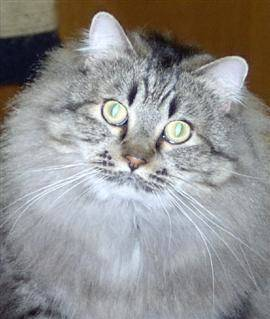

In [5]:
print(imagePaths[0].split(os.path.sep)[-1].split(".")[0])
Image(filename=imagePaths[111])

In [6]:
image = cv2.imread(imagePaths[0], 1)
print(type(image))
print(image.shape)
hist = extract_histogram(image)
print(type(hist))
print(hist.shape)

<class 'numpy.ndarray'>
(374, 500, 3)
<class 'numpy.ndarray'>
(512,)


In [7]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

0


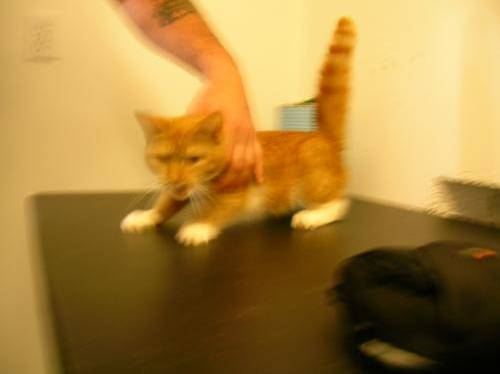

In [8]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

In [9]:
print(type(labels))
print(np.unique(labels, return_counts = True))

<class 'numpy.ndarray'>
(array([0, 1], dtype=int64), array([500, 500], dtype=int64))


In [10]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=2)

In [11]:
model = LinearSVC(random_state = 2, C = 0.94)
model.fit(trainData, trainLabels)

LinearSVC(C=0.94, random_state=2)

In [12]:
predictions = model.predict(testData)

In [13]:
print(np.round(model.coef_[0][280], 2))
print(np.round(model.coef_[0][129], 2))
print(np.round(model.coef_[0][440], 2))

0.2
0.01
0.0


In [14]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.56      0.72      0.63       121
         dog       0.65      0.48      0.55       129

    accuracy                           0.60       250
   macro avg       0.61      0.60      0.59       250
weighted avg       0.61      0.60      0.59       250



In [15]:
from sklearn.metrics import f1_score

In [16]:
f1_score(testLabels, predictions, average='macro')

0.591919191919192

_____________________________________________________

In [17]:
singleImage = cv2.imread('test/cat.1016.jpg')
histt = extract_histogram(singleImage)
print(histt.shape)
histt2 = histt.reshape(1, -1)
print(histt2.shape)
prediction = model.predict(histt2)
print(*prediction)

(512,)
(1, 512)
0


In [18]:
singleImage = cv2.imread('test/cat.1024.jpg')
histt = extract_histogram(singleImage)
print(histt.shape)
histt2 = histt.reshape(1, -1)
print(histt2.shape)
prediction = model.predict(histt2)
print(*prediction)

(512,)
(1, 512)
1


In [19]:
singleImage = cv2.imread('test/dog.1006.jpg')
histt = extract_histogram(singleImage)
print(histt.shape)
histt2 = histt.reshape(1, -1)
print(histt2.shape)
prediction = model.predict(histt2)
print(*prediction)

(512,)
(1, 512)
1


In [20]:
singleImage = cv2.imread('test/dog.1033.jpg')
histt = extract_histogram(singleImage)
print(histt.shape)
histt2 = histt.reshape(1, -1)
print(histt2.shape)
prediction = model.predict(histt2)
print(*prediction)

(512,)
(1, 512)
0
